# Nuclear States Study
By Ricardo Rocha

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conflicts = pd.read_csv('conflicts_and_wars_202403110030.csv', delimiter=',')
nuclear_stockpiles = pd.read_csv('nuclear_weapon/nuclear_weapons_stockpiles.csv', delimiter=',')
display(conflicts.tail(),nuclear_stockpiles.tail())

,Date,Headline,Conflict Type,Country,Region,Description,Sources
922,2019,One Israeli killed and two others injured at a...,Trigger,Palestine,Western Asia,"A homemade bomb explodes at a spring, killing ...",Chronicle News Service 2019
923,2019,"50,000 people flee their homes in central Mali...",Trigger,Mali,Sub-Saharan Africa,"A series of massacres in central Mali, fueled ...",Webb 2019
924,2019,Violence in northwest Syria damages civilian i...,Casualty,Syria,Western Asia,From January through July 2019 violence in nor...,US Agency for International Development 2019
925,2019,"Shrapnel damages a water pipeline, leaving mor...",Casualty,Ukraine,Eastern Europe,Shrapnel from an exploding shells damages a pi...,UNICEF 2019
926,2022,Conflict in Ukraine,Weapon,"Keiv,Ukraine",Eastern Europe,The Russo-Ukrainian War is an ongoing war prim...,UNICEF 2020


,country_name,year,nuclear_weapons_stockpile
775,United States,2018,3785
776,United States,2019,3805
777,United States,2020,3750
778,United States,2021,3708
779,United States,2022,3708


## Are regions that have historicaly been more violent  more likely to have nuclear powers?

To understand violence by region, it is necessary for the nuclear_stockpiles DataFrame to have a region indicating what region each country belongs to so it's possible to correlate with the already defined region in the conflicts DataFrame.

In [3]:
country_to_region = dict(zip(conflicts['Country'], conflicts['Region']))

nuclear_stockpiles['Region'] = nuclear_stockpiles['country_name'].map(country_to_region)
nuclear_stockpiles.tail()

,country_name,year,nuclear_weapons_stockpile,Region
775,United States,2018,3785,North America
776,United States,2019,3805,North America
777,United States,2020,3750,North America
778,United States,2021,3708,North America
779,United States,2022,3708,North America


Histogram: X = Violence, Y = number of nuclear states

In [4]:
violence_region_series = conflicts.groupby('Region')['Region'].count()
violence_region_series

Region
*Western Asia                                                                                                        1
Australia and New Zealand                                                                                            2
Central Asia                                                                                                        15
Eastern Asia                                                                                                        27
Eastern China                                                                                                        1
Eastern Europe                                                                                                      28
Hundreds of residents and municipal union members protest the lack of free water in their town in South Africa.      1
Latin America & the Caribbean                                                                                        2
Latin America and the Ca                 

In [5]:
nuclear_states_dict = dict(nuclear_stockpiles.groupby('Region')['country_name'].nunique())

In [6]:
del violence_region_series['*Western Asia']
del violence_region_series['Latin America and the Ca']
violence_region_series['Latin American and the Caribbean'] = 27+36
del nuclear_states_dict['Sub-Saharan Africa']
nuclear_states_dict['Western Europe'] = 2
nuclear_states_series = pd.Series(nuclear_states_dict)

In [7]:
extra_region_list = ['Australia and New Zealand','Central Asia','Eastern China','Hundreds of residents and municipal union members protest the lack of free water in their town in South Africa.','Latin America & the Caribbean','Latin America and the Caribbean','Melanesia','Northern Africa','Northern Asia','Northern Europe','South-eastern Asia','Southeast Asia','Sub-Saharan Africa','Western Asia','Southwest Asia']
for region in extra_region_list:
    if region not in nuclear_states_series:
        nuclear_states_series[region] = 0
display(nuclear_states_series, violence_region_series)

Eastern Asia                                                                                                       2
Eastern Europe                                                                                                     1
North America                                                                                                      1
Southern Asia                                                                                                      2
Western Asia                                                                                                       1
Western Europe                                                                                                     2
Australia and New Zealand                                                                                          0
Central Asia                                                                                                       0
Eastern China                                                   

Region
Australia and New Zealand                                                                                            2
Central Asia                                                                                                        15
Eastern Asia                                                                                                        27
Eastern China                                                                                                        1
Eastern Europe                                                                                                      28
Hundreds of residents and municipal union members protest the lack of free water in their town in South Africa.      1
Latin America & the Caribbean                                                                                        2
Latin America and the Caribbean                                                                                     27
Melanesia                                

[]

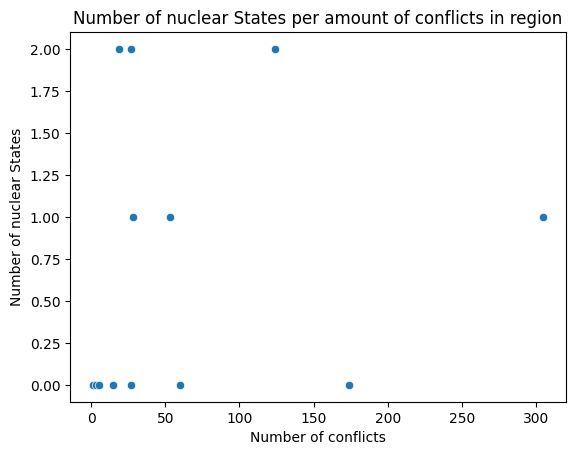

In [8]:
violence_region_list = list(violence_region_series)
violence_region_list = list(nuclear_states_series)

sns.scatterplot(x=violence_region_series, y=nuclear_states_series)
plt.title('Number of nuclear States per amount of conflicts in region')
plt.xlabel('Number of conflicts')
plt.ylabel('Number of nuclear States')
plt.plot()

Question: Are regions that have historicaly been more violent  more likely to have nuclear powers?
Apparent answer: It appears regions with more violence have a slight tendency to develop more nuclear powers. This can possibly be explained by ongoing conflicts some countries in those regions may have. The best example of this is Southern Asia, which have 2 nuclear powers at odds with each other, India and Pakistan. The nuclear development of those nations are intrinsecally connected due to a great sense of animosity between them.

## Are nuclear States more likely to go to war with non-nuclear States?

In [9]:
nuclear_nations = [nation for nation in nuclear_stockpiles.country_name.unique() if 'South Africa' not in nation]
nuclear_nations

['China',
 'France',
 'India',
 'Israel',
 'North Korea',
 'Pakistan',
 'Russia',
 'United Kingdom',
 'United States']

In [10]:
conflicts_with_nuclear_nations = [nation for nation in conflicts.Country if nation.split(', ')[0] in nuclear_nations]
conflicts_with_nuclear_nations

['China',
 'China, Japan',
 'India',
 'China',
 'China',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'China, Japan',
 'China, Japan',
 'France',
 'France, Germany',
 'India, Pakistan',
 'North Korea',
 'North Korea',
 'Israel, Jordan, Syria',
 'North Korea',
 'Israel, Jordan, Syria',
 'Israel, Syria',
 'Israel, Syria',
 'Israel, Palestine',
 'Israel, Jordan, Syria',
 'United States',
 'Israel, Jordan',
 'United States',
 'Israel, Jordan',
 'United States',
 'China',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'China',
 'United States',
 'United States',
 'United States',
 'Israel',
 'United States',
 'United States',
 'United States',
 'North Korea, South Korea',
 'Pakistan',
 'United States',
 'Israel',
 'China',
 'India',
 'China',


Question: Are nuclear States more likely to go to war with non-nuclear States?
Apparent answer: All wars that involved nuclear nations were with non-nuclear countries, with the only exceptions being conflicts between India and Pakistan. This can be easily understood as nuclear powers since WW2 have adopted a policy of MAD (Mutual Assured Destruction) and have therefore chosen to deescalate to avoid devastation.

## Are countries with nuclear weapons involved in more or less conflicts? 

In [11]:
violence_country_series = conflicts.groupby('Country')['Country'].count()
display(violence_country_series, nuclear_nations)

Country
Afghanistan         21
Albania              3
Algeria             18
Angola               4
Angola, Namibia      1
                  ... 
Venezuela            3
Vietnam              2
Yemen              136
Yugoslavia           6
Zambia               5
Name: Country, Length: 159, dtype: int64

['China',
 'France',
 'India',
 'Israel',
 'North Korea',
 'Pakistan',
 'Russia',
 'United Kingdom',
 'United States']

Text(0.5, 1.0, 'Number of conflicts per country')

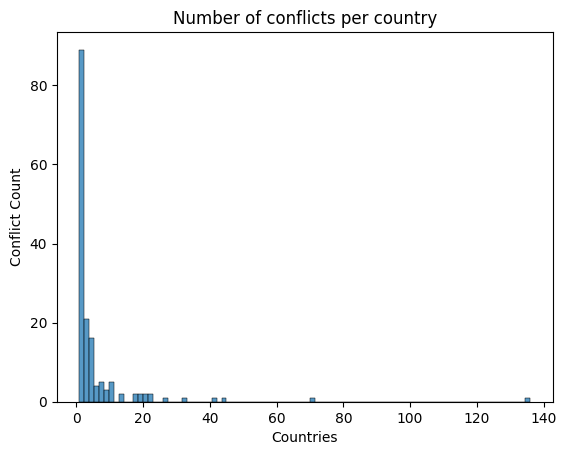

In [12]:
sns.histplot(data=violence_country_series, stat='count')
plt.ylabel('Conflict Count')
plt.xlabel('Countries')
plt.title('Number of conflicts per country')

In [13]:
avg_conflict = round(violence_country_series.mean(), 2)
median_conflict = round(violence_country_series.median(), 2)

print(f'Average number of conflicts: \n{avg_conflict}\n\nMedian number of conflicts:\n{median_conflict}')

Average number of conflicts: 
5.83

Median number of conflicts:
2.0


In [14]:
conflicts_nuclear_dict = {'China': len([country for country in conflicts_with_nuclear_nations if country == 'China']),
'France': len([country for country in conflicts_with_nuclear_nations if country == 'France']),
'India': len([country for country in conflicts_with_nuclear_nations if country == 'India']),
'Israel': len([country for country in conflicts_with_nuclear_nations if country == 'Israel']),
'North Korea': len([country for country in conflicts_with_nuclear_nations if country == 'North Korea']),
'Pakistan': len([country for country in conflicts_with_nuclear_nations if country == 'Pakistan']),
'Russia': len([country for country in conflicts_with_nuclear_nations if country == 'Russia']),
'United Kingdom': len([country for country in conflicts_with_nuclear_nations if country == 'United Kingdom']),
'United States': len([country for country in conflicts_with_nuclear_nations if country == 'United States'])}

In [15]:
comparison_nuclear_average_dict = {country:conflict>avg_conflict for (country,conflict) in conflicts_nuclear_dict.items()}
comparison_nuclear_average_dict

{'China': True,
 'France': True,
 'India': True,
 'Israel': False,
 'North Korea': False,
 'Pakistan': True,
 'Russia': False,
 'United Kingdom': False,
 'United States': True}

In [16]:
comparison_nuclear_median_dict = {country:conflict>median_conflict for (country,conflict) in conflicts_nuclear_dict.items()}
comparison_nuclear_median_dict

{'China': True,
 'France': True,
 'India': True,
 'Israel': True,
 'North Korea': True,
 'Pakistan': True,
 'Russia': False,
 'United Kingdom': False,
 'United States': True}

Question: Are countries with nuclear weapons involved in more or less conflicts? 
Apparent answer: About half of the nuclear powers have been in more conflicts than the average nation but all except Russia and the United Kingdom have been in more than the median. It is however necessary to consider the following aspects: 1) The USSR (Russia), the USA, the UK and France have been involved in many proxy wars during the Cold War, which ends up not counting to their score of conflicts. 2) Russia, especially, has been involved in many conflicts utilizing the Wagner Group or army battalions under the blag flag to attack enemy States, mostly in the Middle East. 3) After WW2, many regions in the world have experienced a relative peace and that greatly reduced the average and median conflicts per country.